### Perform a complete EDA workflow on a given dataset:  Data cleaning, Univariate & bivariate analysis, Outlier detection, Missing value treatment, Feature correlation analysis.And also Preprocessing using ColumnTransformer to handle missing values, encode categorical data, and scale numerical features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
data = pd.read_csv('D:\\Advanced_training\\Advanced-training-Python-AIML\\adult.csv')

In [3]:
data = pd.read_csv("D:/Advanced_training/Advanced-training-Python-AIML/adult.csv")


In [4]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


#### Data cleaning (Replace ? into nan so we can handle null value using predifined function)

In [5]:
for col in data.columns:
    data[col]=data[col].replace('?',np.nan)


In [6]:
data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [7]:
data.duplicated().sum()
data.drop_duplicates(inplace=True)
data.duplicated().sum()

np.int64(0)

#### Univariate

In [8]:
numarical_col = data.describe().columns
data.describe() ## univariant Analysis


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       30701 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education.num   32537 non-null  int64 
 5   marital.status  32537 non-null  object
 6   occupation      30694 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital.gain    32537 non-null  int64 
 11  capital.loss    32537 non-null  int64 
 12  hours.per.week  32537 non-null  int64 
 13  native.country  31955 non-null  object
 14  income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [10]:
data.nunique()

age                  73
workclass             8
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           14
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       41
income                2
dtype: int64

In [11]:
temp_data_for_categorical_analysis = data.drop(columns=numarical_col)

In [12]:
temp_data_for_categorical_analysis.mode() ## univariant analysis

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K


In [13]:
categorical_col = temp_data_for_categorical_analysis.mode().columns
categorical_col

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

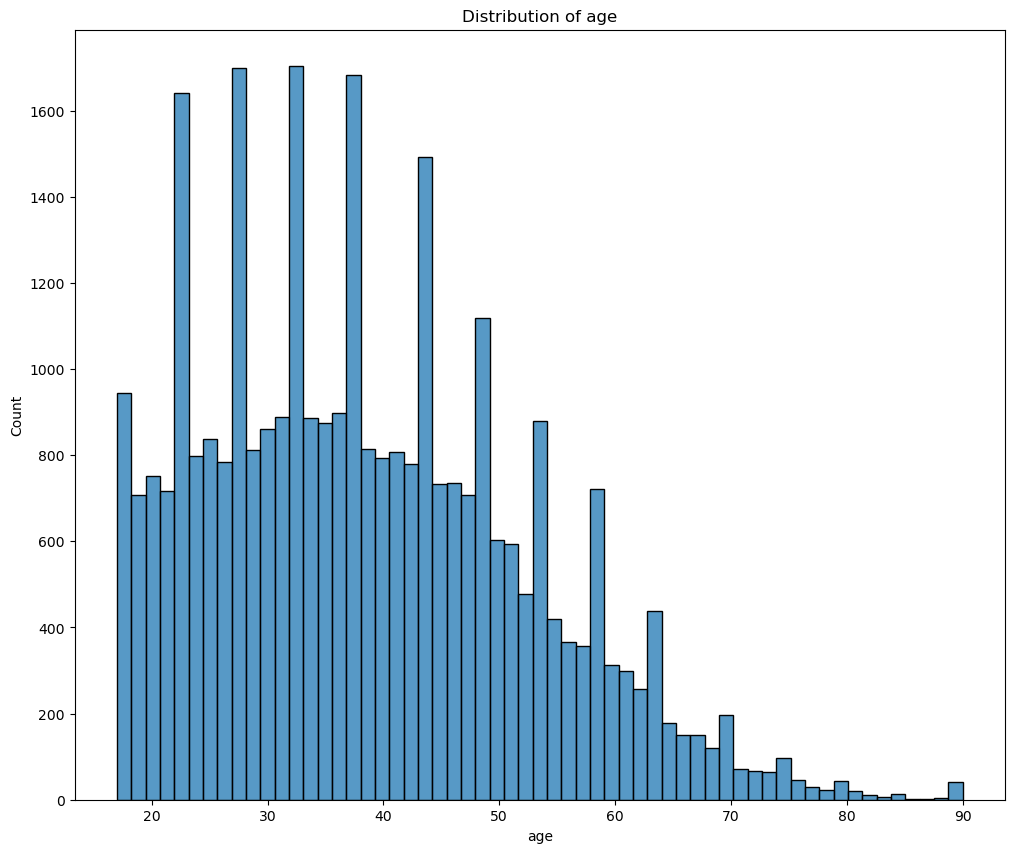

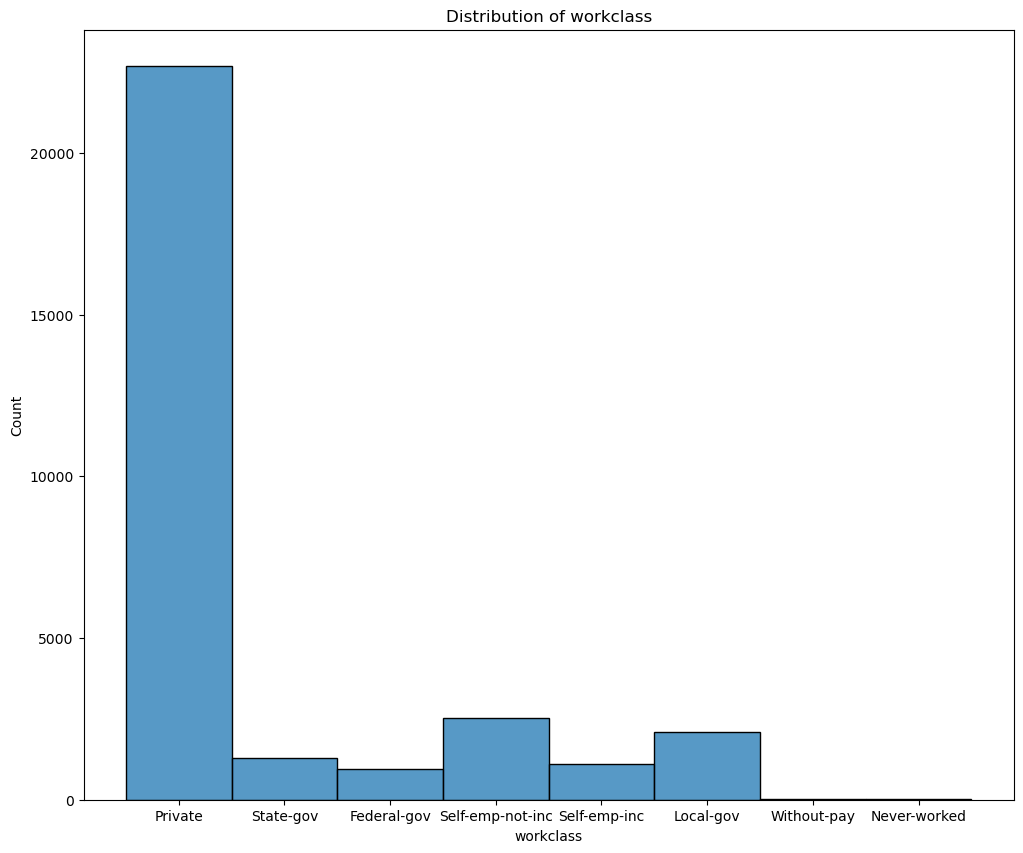

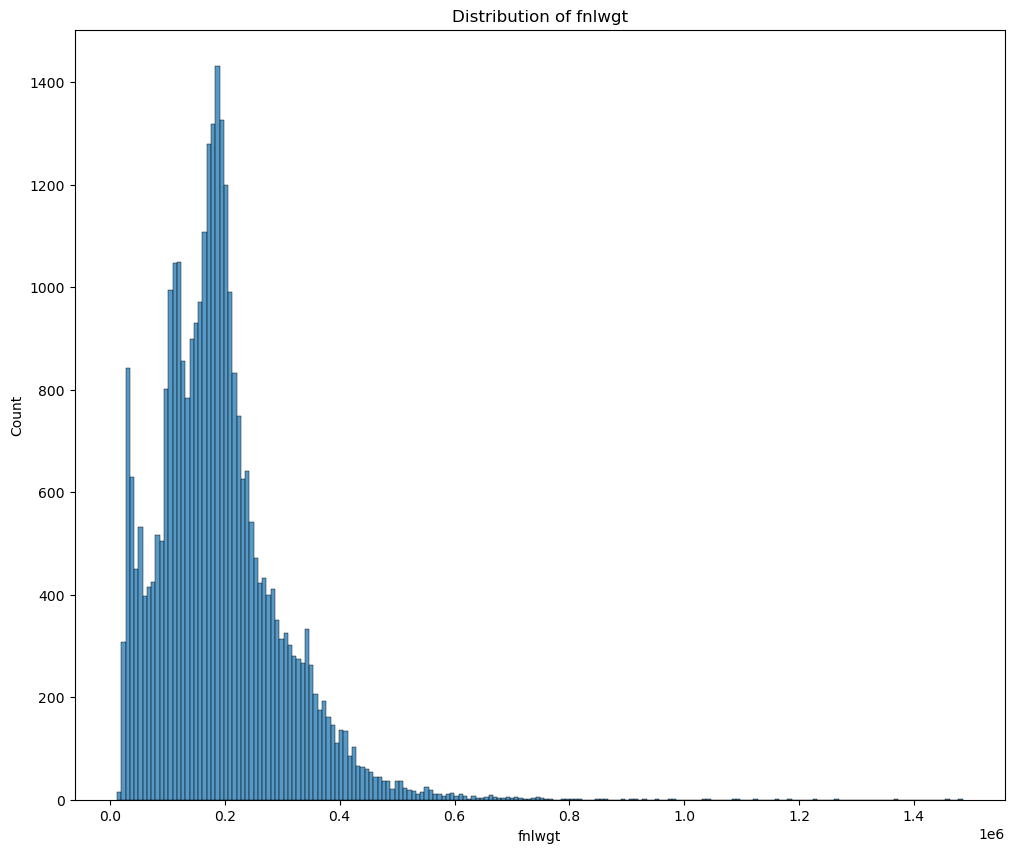

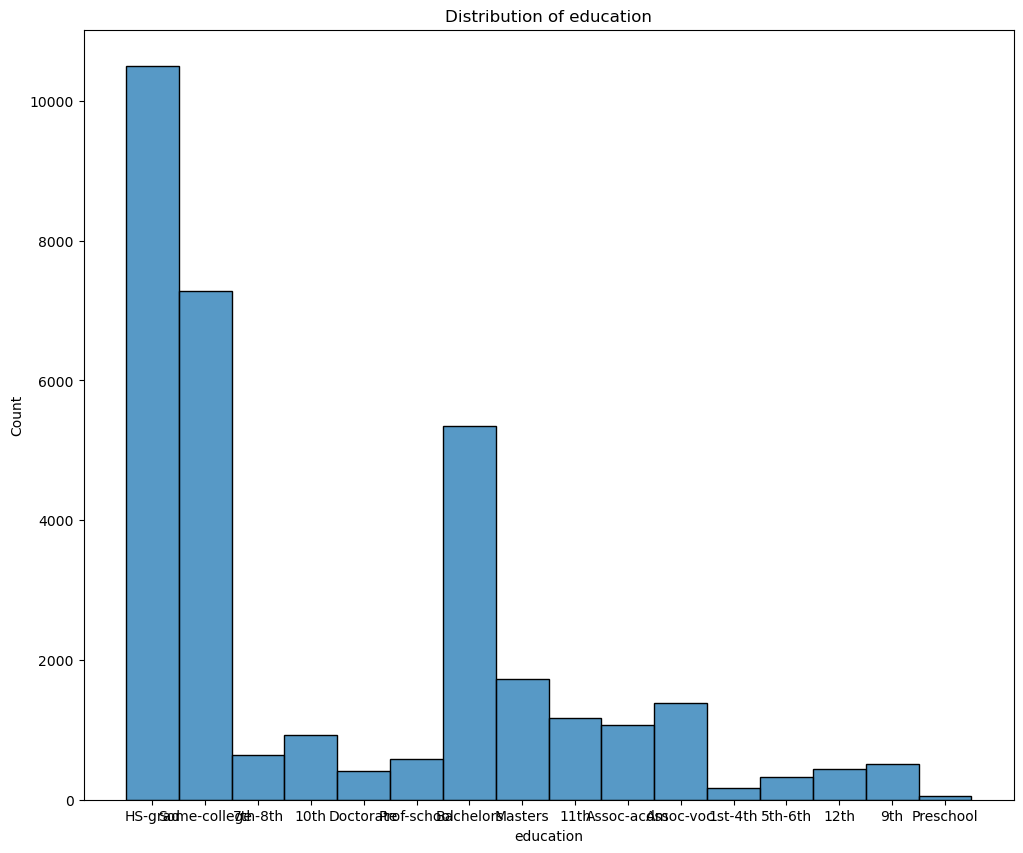

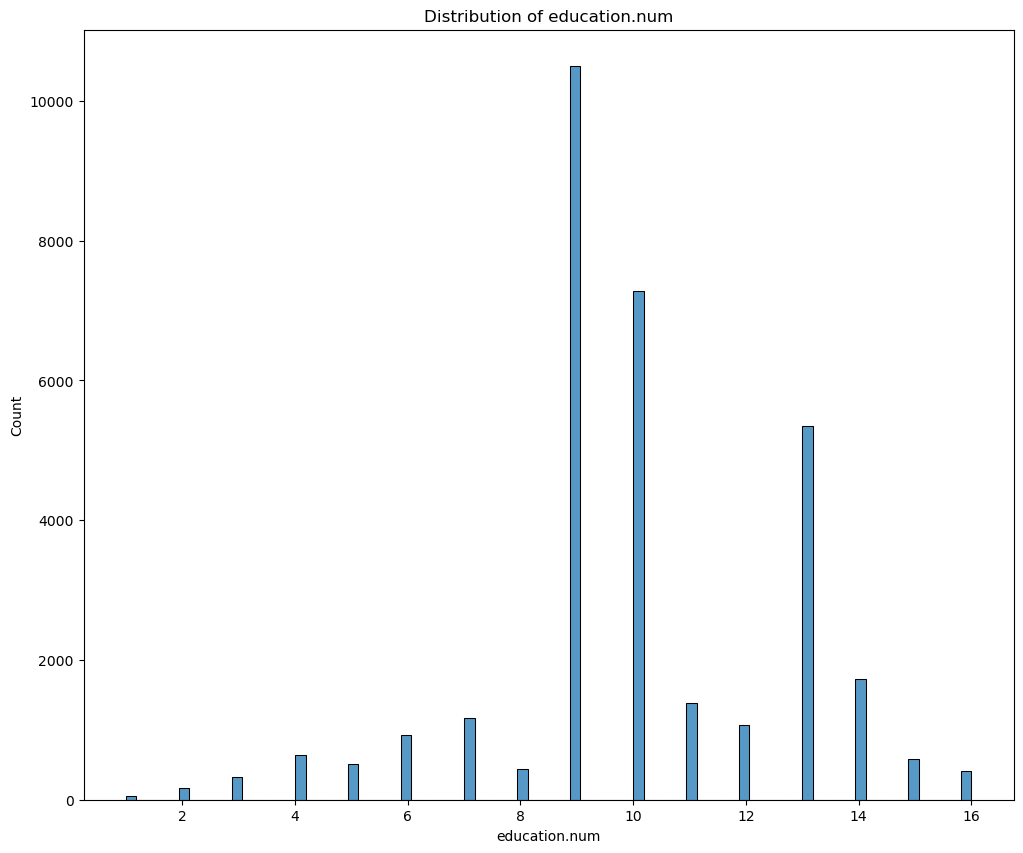

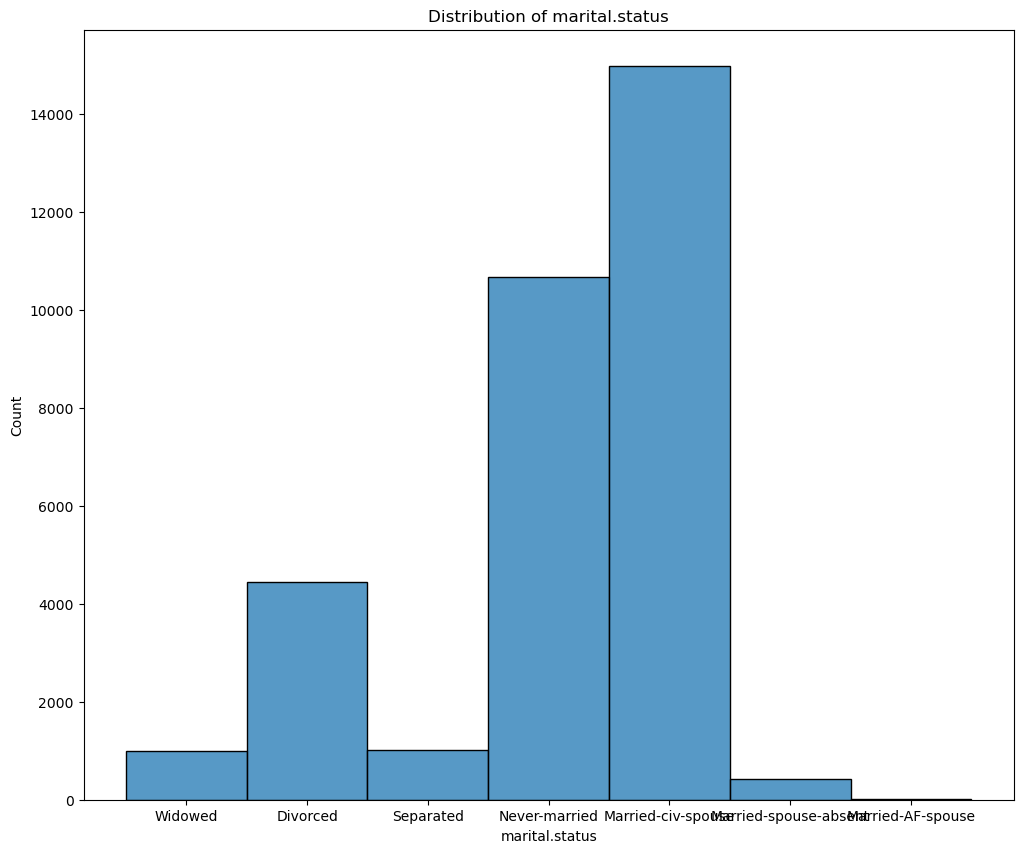

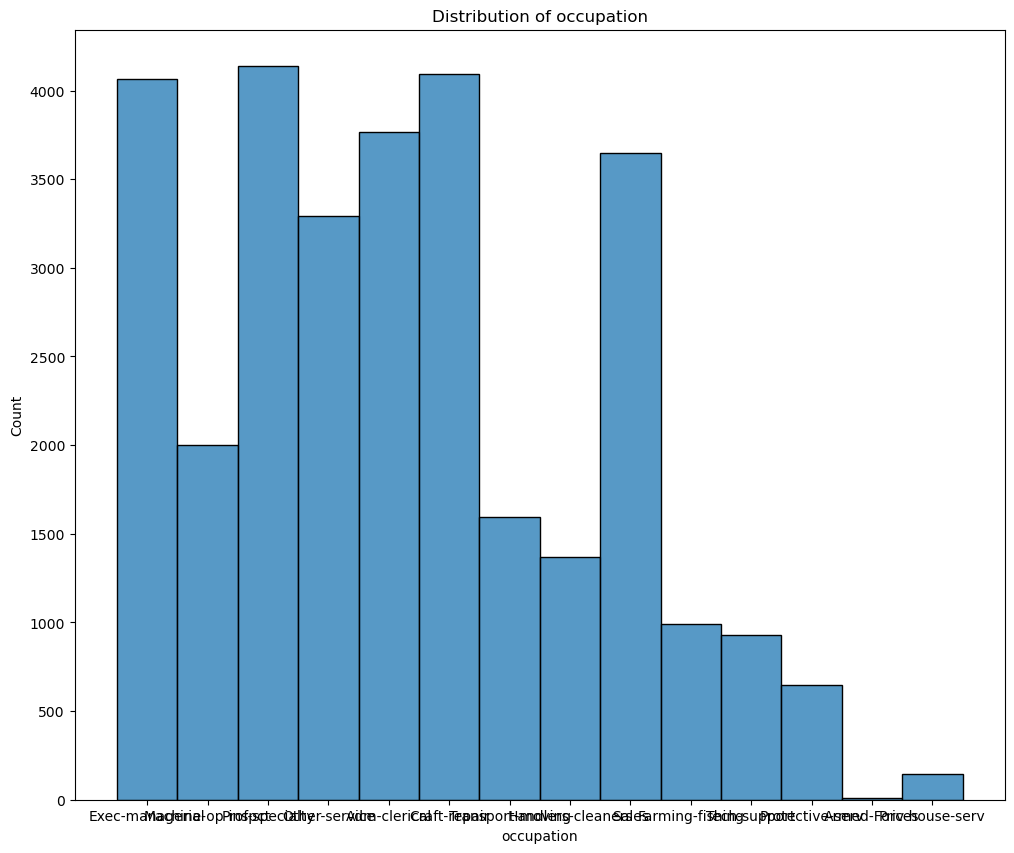

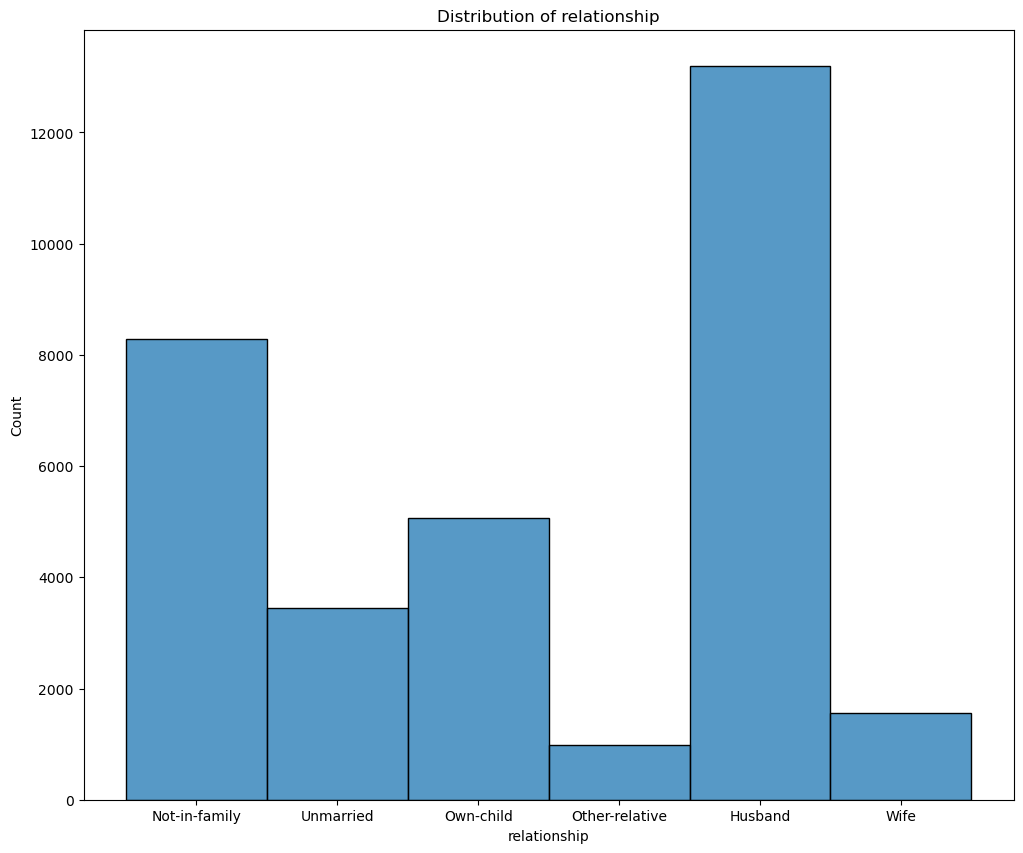

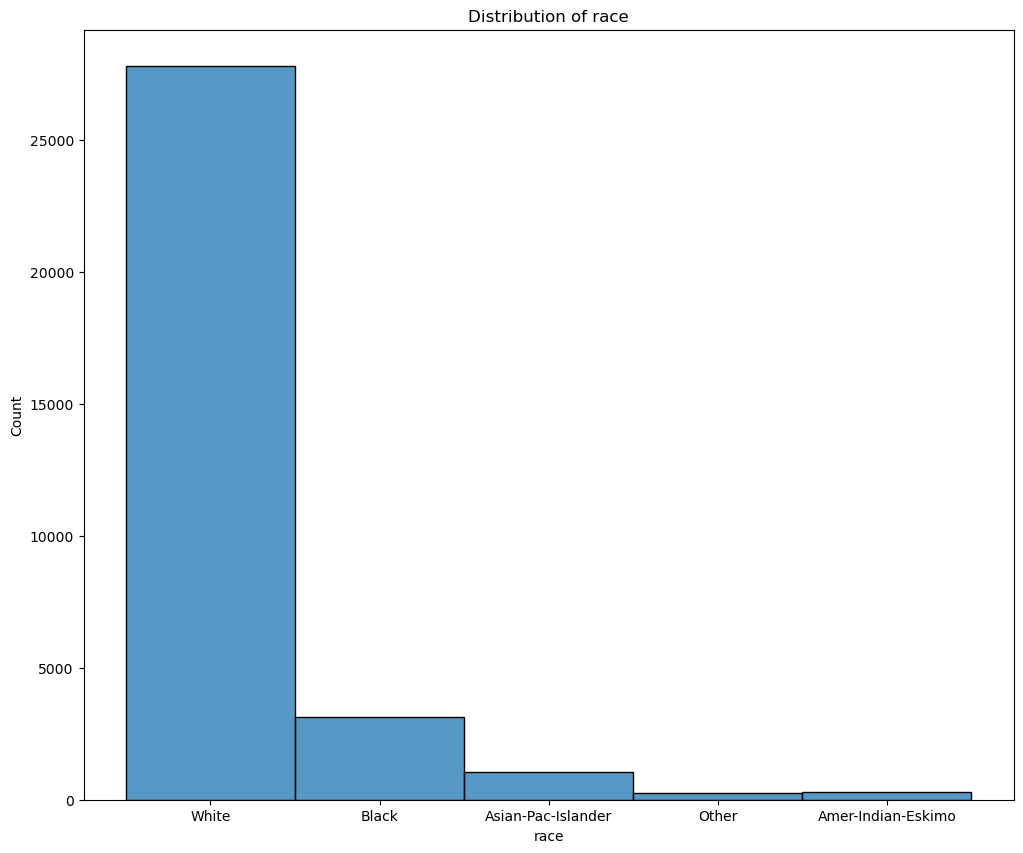

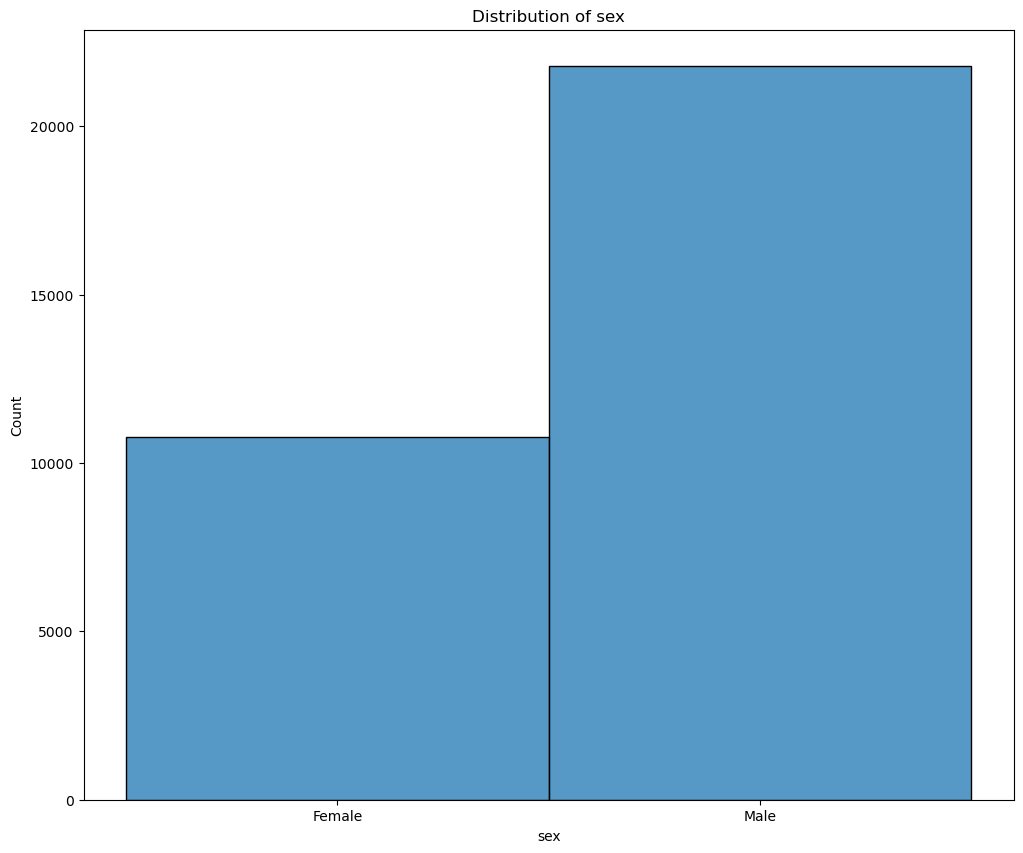

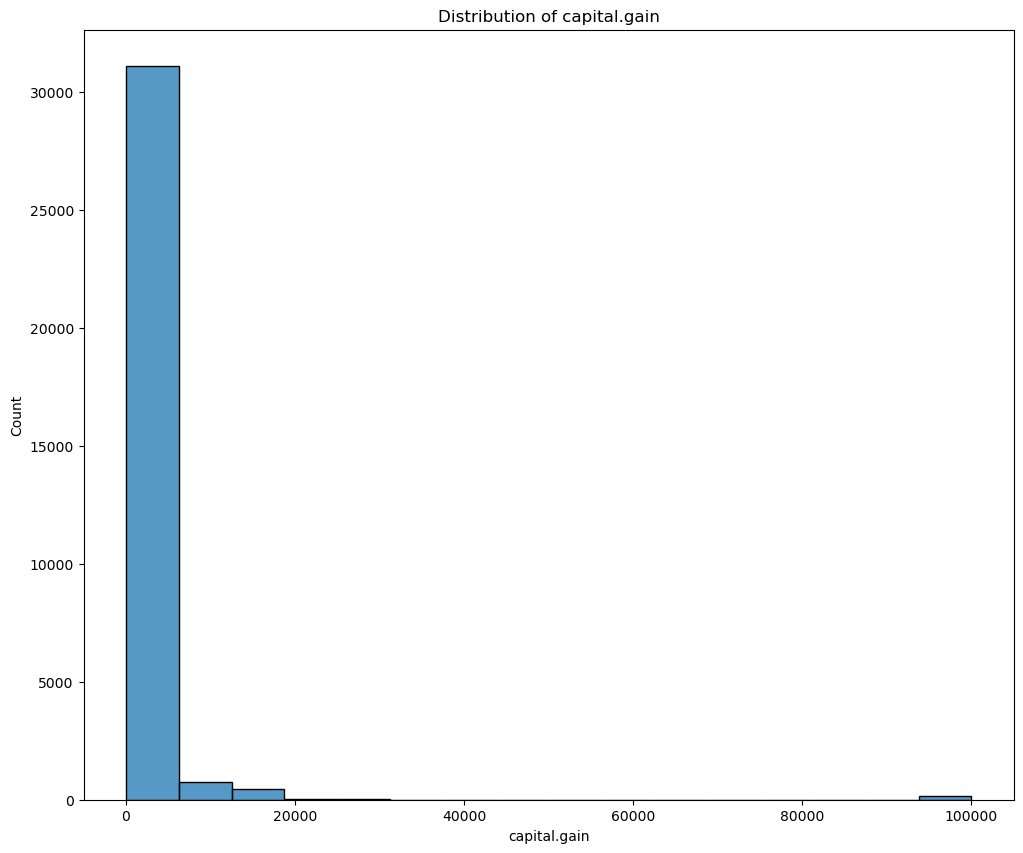

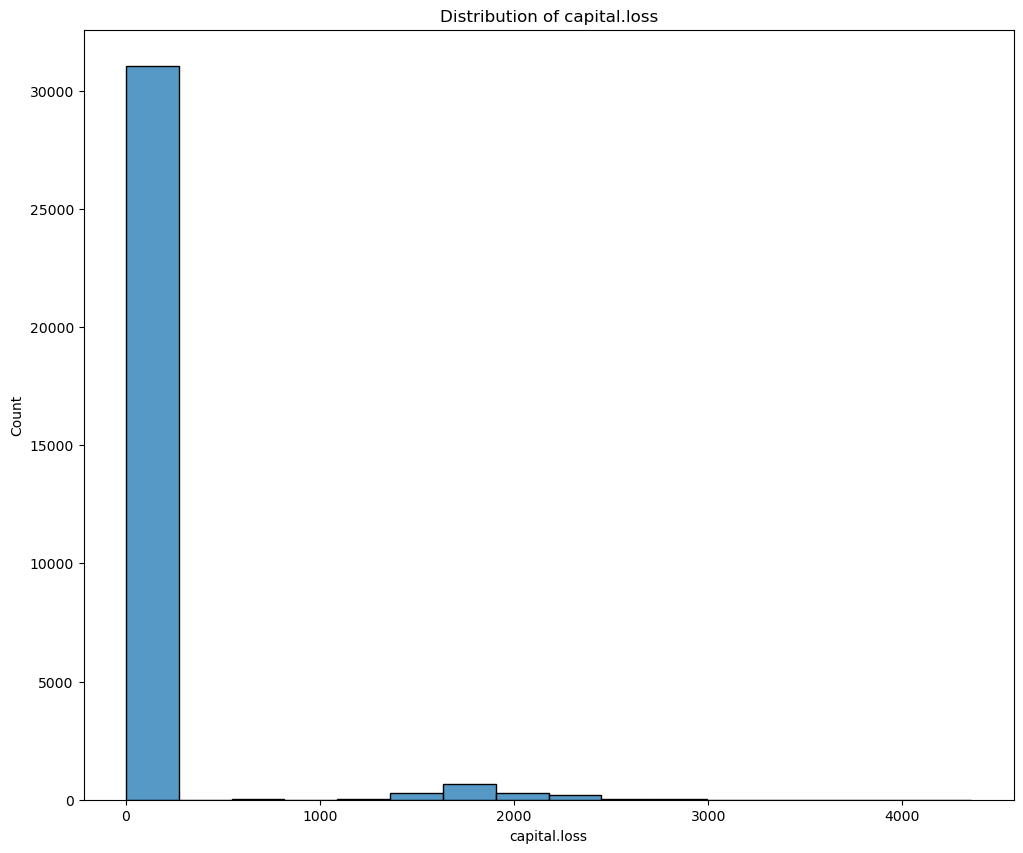

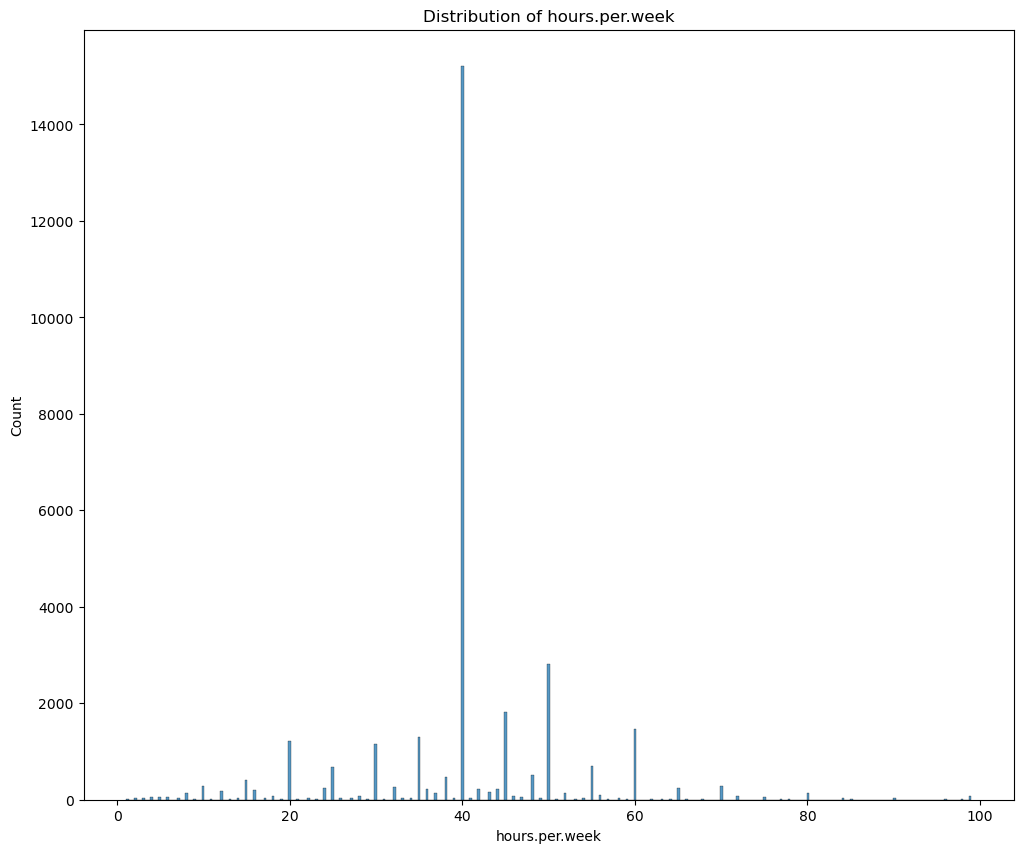

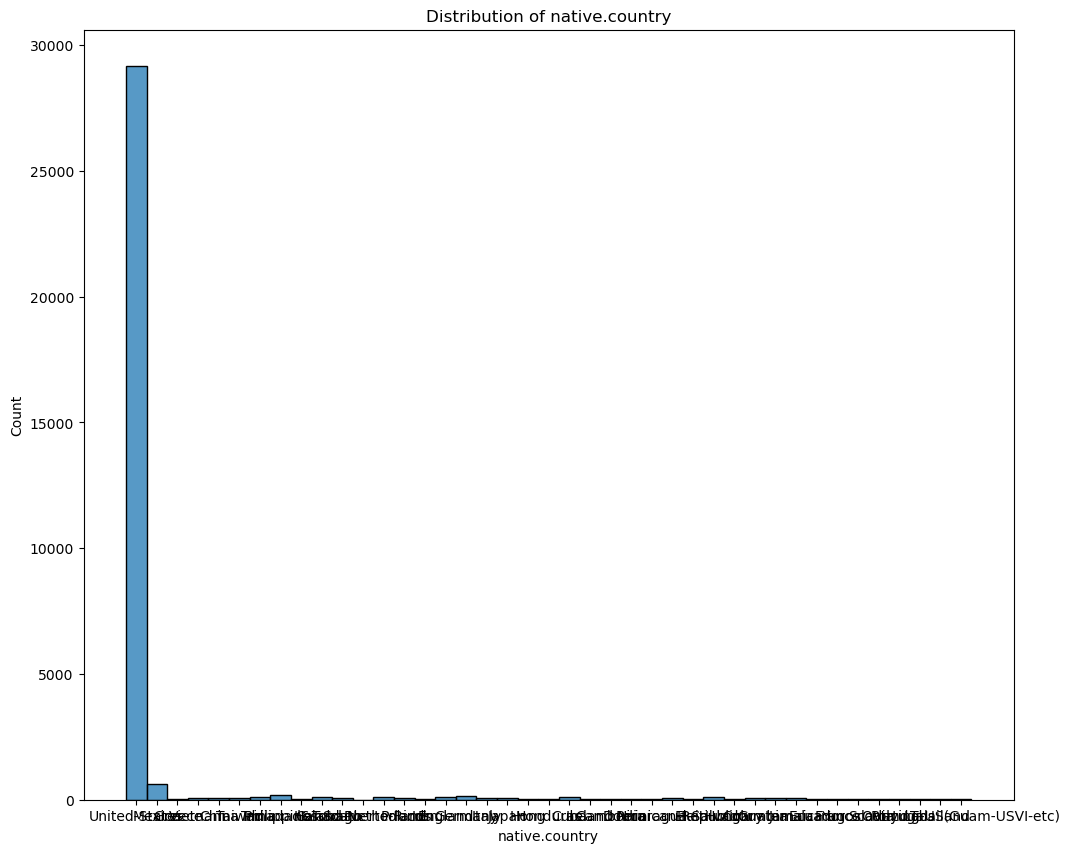

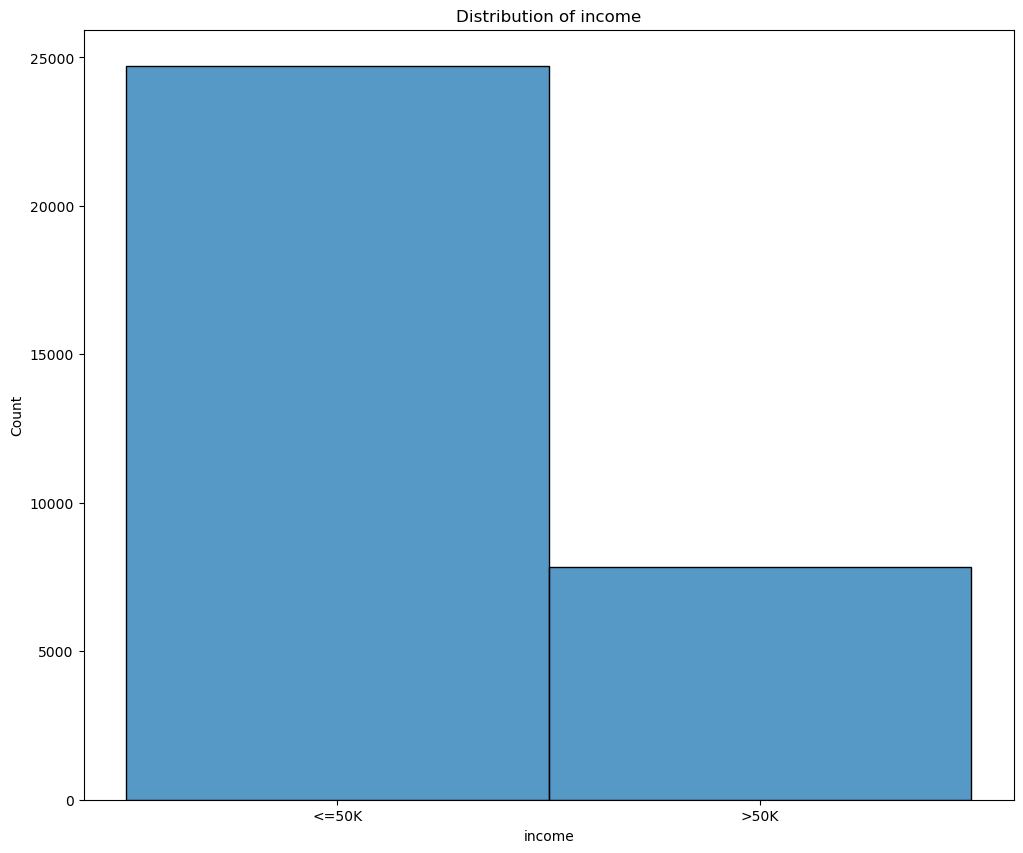

In [14]:
for col in data.columns:
    plt.figure(figsize=(12,10))
    sns.histplot(data[col])
    plt.title(f'Distribution of {col}')

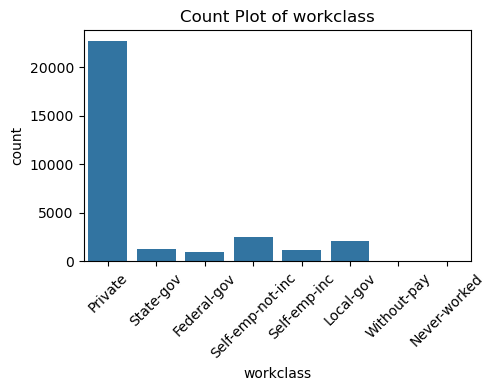

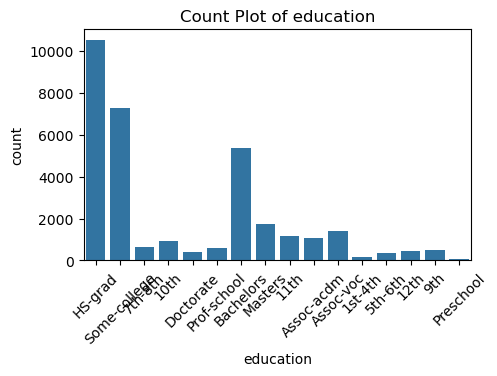

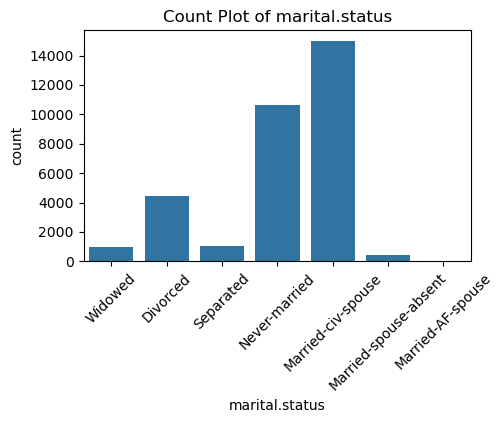

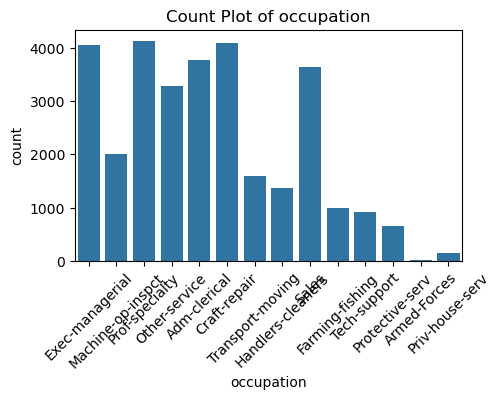

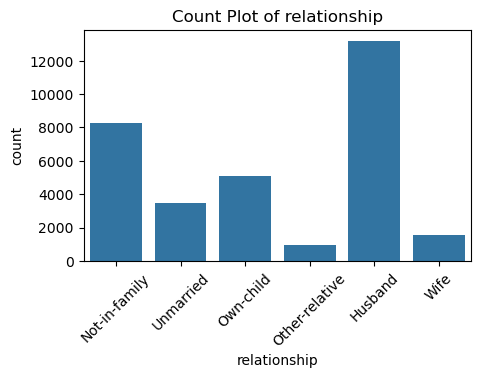

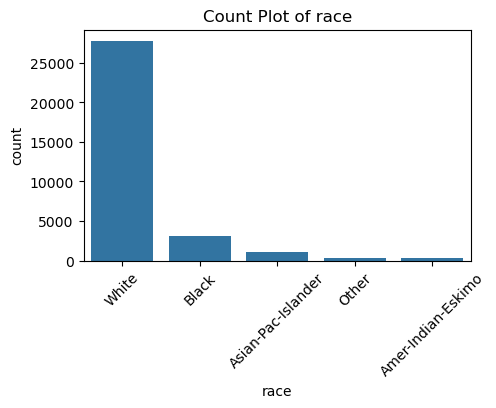

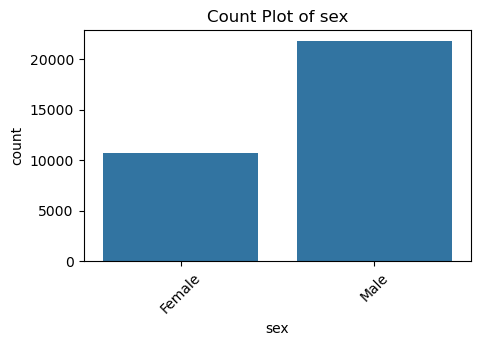

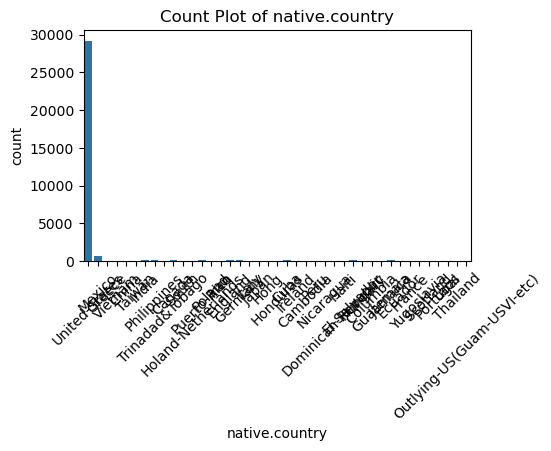

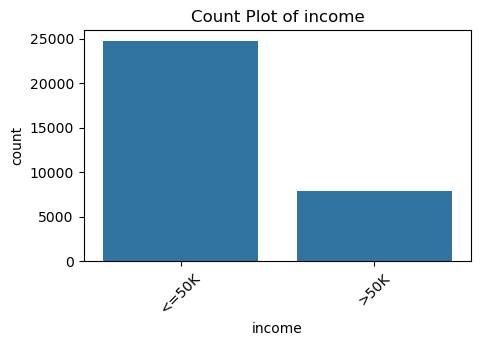

In [15]:
# vcat_cols = data.select_dtypes(include=['object']).columns

for col in categorical_col:
    plt.figure(figsize=(5,3))
    sns.countplot(x=data[col])
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()


### bivariante Analysis

In [16]:
sns.pairsns.pairplot(data[numarical_col])
plt.show()
plot(data[numarical_col])
plt.show()


AttributeError: module 'seaborn' has no attribute 'pairsns'

In [ ]:
for col in numarical_col:
    for num in categorical_col:
        plt.figure(figsize=(5,3))
        sns.boxplot(x=data[col], y=data[num])
        plt.title(f'{num} by {col}')
        plt.xticks(rotation=45)
        plt.show()


### Box Plot

In [ ]:
for col in num_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [ ]:
for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower) | (data[col] > upper)]
    print(f'{col}: {len(outliers)} outliers')
